# Project :  **The New COO**

<div class="alert alert-block alert-info" style="margin-top: 20px">
We categorize our entire analysis into 4 main steps.
    
    
**STEP1** : EDA to explore our dataset a little 
    
**STEP2** : We determine the number of dependant variables and do separated analysis for each one of them
    
**STEP3** : Apply 'Feature Selection' method to find out other related important features for our analysis using ML Algorithms
    
**STEP4** : Finally analysis through visualization
    
</div>


***

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
print(plt.style.available)
style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
df = pd.read_csv("Downloads/sales.csv")

## <span style='background:darkgray'>   STEP1:   </span>

In [3]:
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,54669.06


In [4]:
print("The number of rows in dataset is: ",len(df.index))
print("The number of columns in dataset is: ",len(df.columns))

The number of rows in dataset is:  10000
The number of columns in dataset is:  11


In [5]:
print("The null values for first three features of the dataset are as follows:")
df.isnull().sum().sort_values(ascending=False).head(3)

The null values for first three features of the dataset are as follows:


Region       0
Country      0
Item Type    0
dtype: int64

In [6]:
df.nunique().head(10)

Region                7
Country             185
Item Type            12
Sales Channel         2
Order Priority        4
Order Date         2691
Order ID          10000
Ship Date          2719
Units Sold         6307
Unit Price           12
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      10000 non-null  float64
 10  Total Profit    10000 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


In [8]:
df.describe()

,Order ID,Units Sold,Unit Price,Total Profit
count,1.000000e+04,10000.000000,10000.000000,1.000000e+04
mean,5.498719e+08,5002.855900,268.143139,3.950893e+05
std,2.607835e+08,2873.246454,217.944092,3.775550e+05
min,1.000892e+08,2.000000,9.330000,4.338000e+01
25%,3.218067e+08,2530.750000,109.280000,9.832914e+04
50%,5.485663e+08,4962.000000,205.700000,2.890990e+05
75%,7.759981e+08,7472.000000,437.200000,5.664227e+05
max,9.999342e+08,10000.000000,668.270000,1.738178e+06


In [9]:
print("Number of duplicated values in our dataset:",df.duplicated().sum())

Number of duplicated values in our dataset: 0


In [10]:
df["Order Priority"].value_counts()

C    2555
H    2503
L    2494
M    2448
Name: Order Priority, dtype: int64

In [11]:
df["Order Priority"] = df["Order Priority"].map({'C':'Critical' , 'H':'High' , 'L':'Low' , 'M':'Medium'})

# We drop orderid column as it doesn't seem to help in thissales analysis

df.drop(["Order ID"] , axis=1 , inplace=True)

In [12]:
df["Revenue"] = df["Units Sold"]*df["Unit Price"]
df.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Total Profit,Revenue
0,Sub-Saharan Africa,Chad,Office Supplies,Online,Low,1/27/2011,2/12/2011,4484,651.21,566105.00,2920025.64
1,Europe,Latvia,Beverages,Online,Critical,12/28/2015,1/23/2016,1075,47.45,16834.50,51008.75
2,Middle East and North Africa,Pakistan,Vegetables,Offline,Critical,1/13/2011,2/1/2011,6515,154.06,411291.95,1003700.90


## <span style='background:darkgray'>   STEP2:   </span>

We see that our dataset now has two dependant features, namely, **Total Profit** & **Total Revenue.**

   So we split our analysis in two ways. 

## <span style='background:darkgray'>   STEP3:   </span>

This step consists of two sub-steps for two analysis.

        Sub-STEP 3.1: Analysis with respect to "Total Profit"

        Sub-STEP 3.2: Analysis with respect to "Revenue"

In [13]:
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

>>  **Sub-STEP 3.1**  (Feature selection with respect to Total Profit)

In [14]:
df1 = df.iloc[:,0:10]
df1.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,Low,1/27/2011,2/12/2011,4484,651.21,566105.00
1,Europe,Latvia,Beverages,Online,Critical,12/28/2015,1/23/2016,1075,47.45,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,Critical,1/13/2011,2/1/2011,6515,154.06,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,Critical,9/11/2012,10/6/2012,7683,668.27,1273303.59
4,Europe,Czech Republic,Beverages,Online,Critical,10/27/2015,12/5/2015,3491,47.45,54669.06


In [15]:
labelencoder = LabelEncoder()

df1["Sales Channel"] = labelencoder.fit_transform(df1["Sales Channel"].values)
df1["Order Priority"] = labelencoder.fit_transform(df1["Order Priority"].values)
df1["Item Type"] = labelencoder.fit_transform(df1["Item Type"].values)
df1["Country"] = labelencoder.fit_transform(df1["Country"].values)
df1["Region"] = labelencoder.fit_transform(df1["Region"].values)
df1.drop(["Order Date"],axis=1,inplace=True)
df1.drop(["Ship Date"],axis=1,inplace=True)
df1.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Total Profit
0,6,29,8,1,2,4484,651.21,566105.00
1,3,85,1,1,0,1075,47.45,16834.50
2,4,122,11,0,0,6515,154.06,411291.95
3,6,38,6,1,0,7683,668.27,1273303.59
4,3,37,1,1,0,3491,47.45,54669.06


### `~ Feature Selection`

In [16]:
X = df1.iloc[:101,0:7]
Y = df1.iloc[:101,7]

lab_enc = preprocessing.LabelEncoder()
Y_encoded = lab_enc.fit_transform(Y)

In [17]:
# Feature Selection By Univariate selection method(Chi^2 test)
chi_2 = SelectKBest(score_func=chi2, k=7)
chi_2.fit(X,Y_encoded)


# Feature selection by RandomForestClassifier
r_forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
r_forest.fit(X,Y_encoded)


# Feature selection by recursive selection method
l_regression = LogisticRegression(solver='lbfgs')
rfe = RFE(l_regression , n_features_to_select=7)
rfe.fit(X,Y_encoded)

RFE(estimator=LogisticRegression(), n_features_to_select=7)

Text(0.5, 1.0, 'Score visualization for features by Recursive Selection Method')

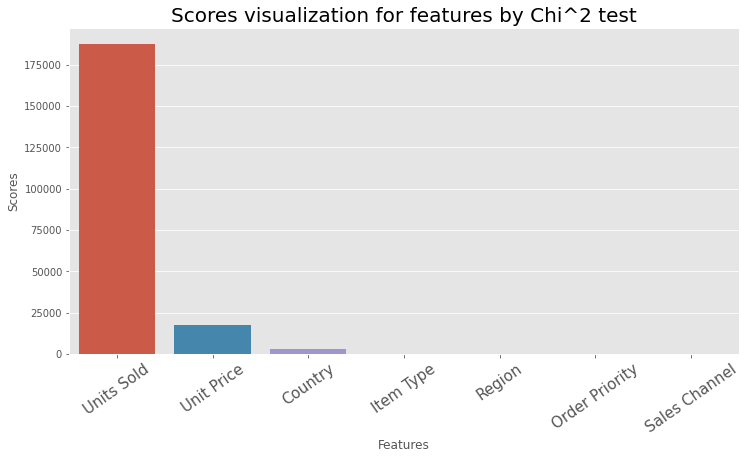

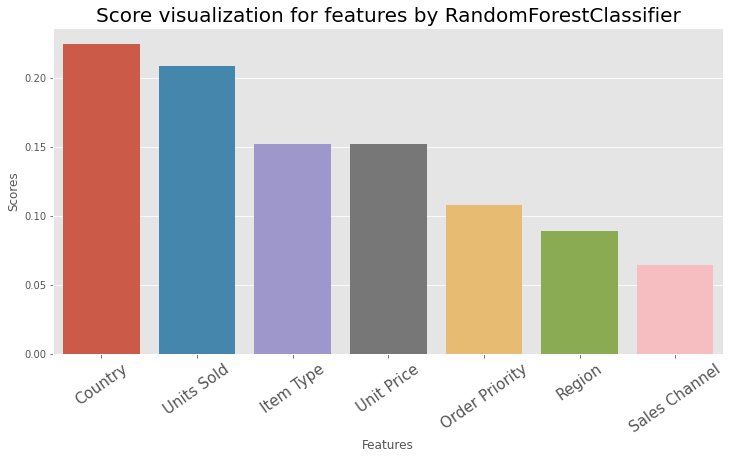

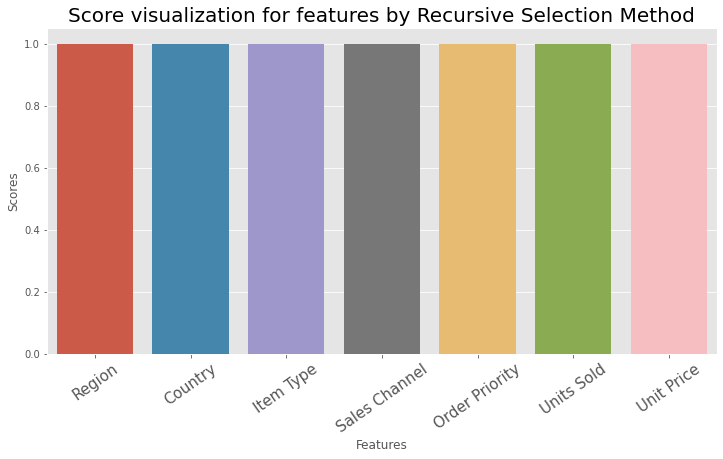

In [18]:
score = pd.DataFrame({'Features': X.columns , 'Scores': chi_2.scores_})
score2 = pd.DataFrame({'Features' : X.columns , 'Scores' : r_forest.feature_importances_})
score3 = pd.DataFrame({'Features' : X.columns , 'Scores' : rfe.ranking_})

plt.figure(figsize=(12,6))
sns.barplot(x='Features' , y='Scores' , data=score.sort_values(by='Scores',ascending=False))
plt.xticks(rotation=35, size=15)
plt.title("Scores visualization for features by Chi^2 test",size=20)


plt.figure(figsize=(12,6))
sns.barplot(x='Features' , y='Scores' , data=score2.sort_values(by='Scores',ascending=False))
plt.xticks(size=15 , rotation=35)
plt.title("Score visualization for features by RandomForestClassifier",size=20)


plt.figure(figsize=(12,6))
sns.barplot(x='Features' , y='Scores' , data=score3.sort_values(by='Scores',ascending=False))
plt.xticks(size=15 , rotation=35)
plt.title("Score visualization for features by Recursive Selection Method",size=20)

So, we start analyzing total profit with respect to country & Units sold

                  Country  Total Profit
0                    Laos    1738178.39
1                 Somalia    1735396.47
2                    Mali    1732788.42
3              Mozambique    1732614.55
4                  Sweden    1731397.46
5                  Rwanda    1730875.85
6               Singapore    1728615.54
7  Bosnia and Herzegovina    1728615.54
8                Botswana    1728441.67
9                  Monaco    1727572.32


<AxesSubplot:xlabel='Total Profit', ylabel='Country'>

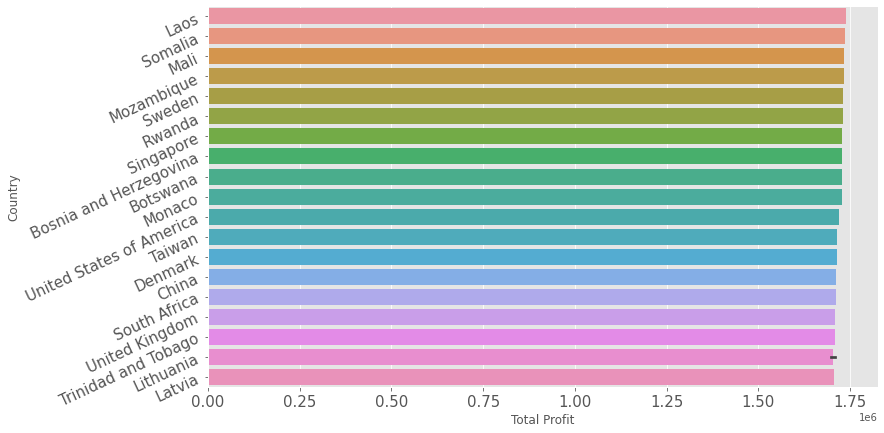

In [19]:
C_top20 = df.sort_values(by='Total Profit',ascending=False).loc[: , ['Country','Total Profit']].head(20)
C_top20.reset_index(drop=True , inplace=True)
print(C_top20.head(10))

plt.figure(figsize=(12,7))
plt.xticks(size=15)
plt.yticks(rotation=25 , size=15)
sns.barplot(x='Total Profit',y='Country', data=C_top20)

> **We see that the highest ammount of profit comes from country Laos, followed by country Somalia. So that's a good news. 
We need to as well check which country possesses the lowest amount of profit and start diving deep into that crisis.**

        Country  Total Profit
0   Philippines         43.38
1         Ghana         57.84
2  Turkmenistan         62.64
3        Bhutan         72.30
4      Honduras         72.30
5     Indonesia        125.28
6          Cuba        171.11
7        Russia        191.72
8        Malawi        241.00
9        Jordan        243.41


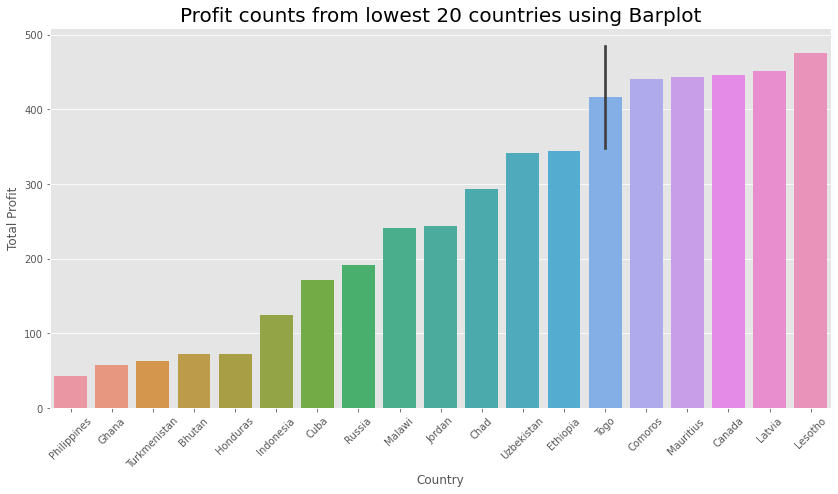

In [20]:
C_low20 = df.sort_values(by='Total Profit',ascending=True).loc[: , ['Country','Total Profit']].head(20)
C_low20.reset_index(drop=True , inplace=True)
print(C_low20.head(10))

plt.figure(figsize=(14,7))
plt.title("Profit counts from lowest 20 countries using Barplot",size=20)
plt.xticks(rotation=45)
sns.barplot(x='Country',y='Total Profit', data=C_low20)
plt.show()

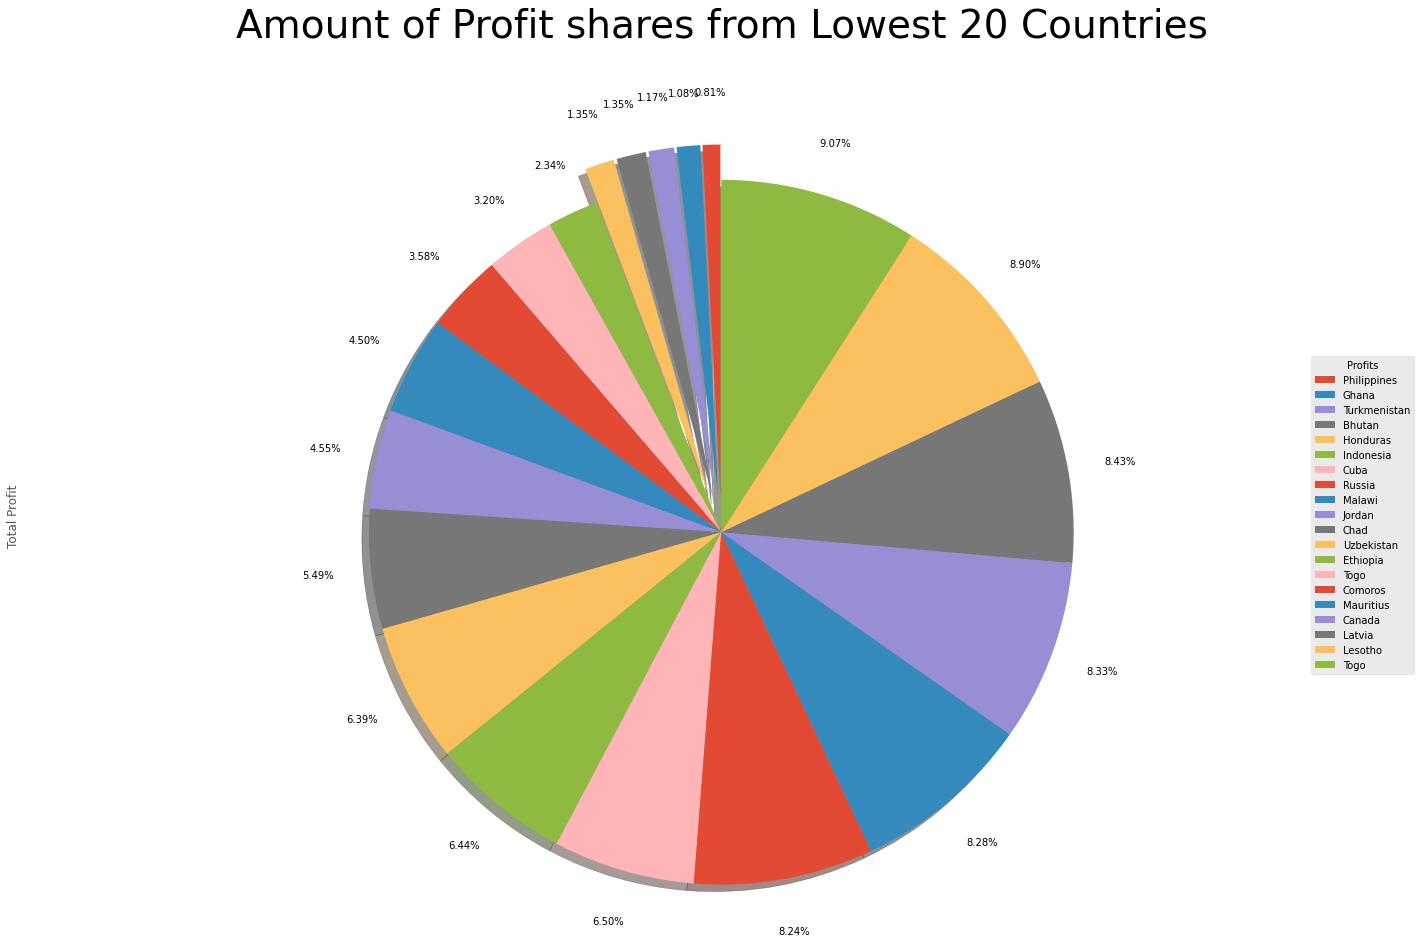

In [21]:
a=[]
b=[]
for i in range (0,20):
    if i<5:
        a.append(0.1)
    else:
        b.append(0)
Explode_list = a + b
Explode_list

C_low20["Total Profit"].plot(kind='pie' , figsize=(25,15) , startangle=90 , autopct='%1.2f%%' , 
                                        shadow=True, labels=None , pctdistance=1.15,explode=Explode_list)

plt.title("Amount of Profit shares from Lowest 20 Countries" , 
          c = "black" , size=39 , y=1.08)
plt.axis("equal")
plt.legend(title='Profits' , labels=C_low20["Country"],loc='center right')
plt.

In [22]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Total Profit,Revenue
0,Sub-Saharan Africa,Chad,Office Supplies,Online,Low,1/27/2011,2/12/2011,4484,651.21,566105.00,2920025.64
1,Europe,Latvia,Beverages,Online,Critical,12/28/2015,1/23/2016,1075,47.45,16834.50,51008.75
2,Middle East and North Africa,Pakistan,Vegetables,Offline,Critical,1/13/2011,2/1/2011,6515,154.06,411291.95,1003700.90
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,Critical,9/11/2012,10/6/2012,7683,668.27,1273303.59,5134318.41
4,Europe,Czech Republic,Beverages,Online,Critical,10/27/2015,12/5/2015,3491,47.45,54669.06,165647.95


Cosmetics          8
Baby Food          7
Office Supplies    7
Cereal             5
Vegetables         4
Meat               4
Clothes            4
Personal Care      4
Fruits             4
Beverages          3
Household          3
Snacks             1
Name: Item Type, dtype: int64


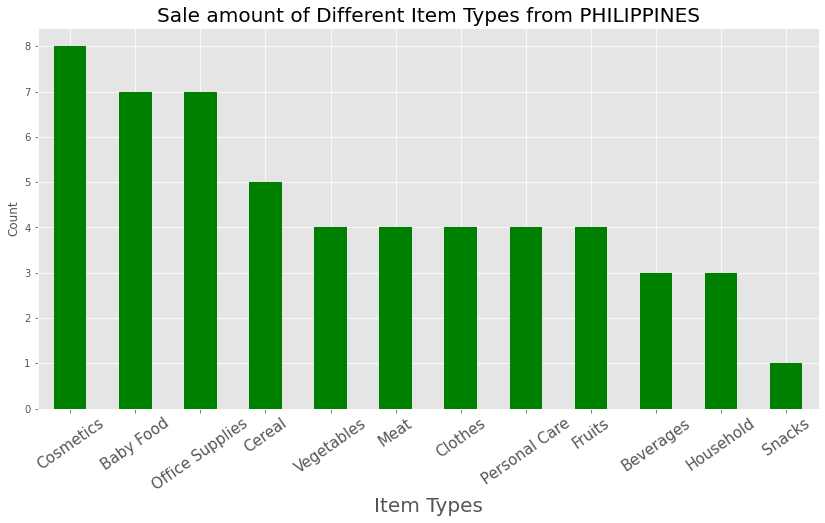

In [23]:
print(df[df.Country=='Philippines']['Item Type'].value_counts())
plt.figure(figsize=(14,7))
df[df.Country=='Philippines']['Item Type'].value_counts().plot(kind='bar',color='green')
plt.xticks(rotation=35,size=15)
plt.xlabel("Item Types",size=20)
plt.ylabel('Count')
plt.title('Sale amount of Different Item Types from PHILIPPINES',size=20)
plt.show()

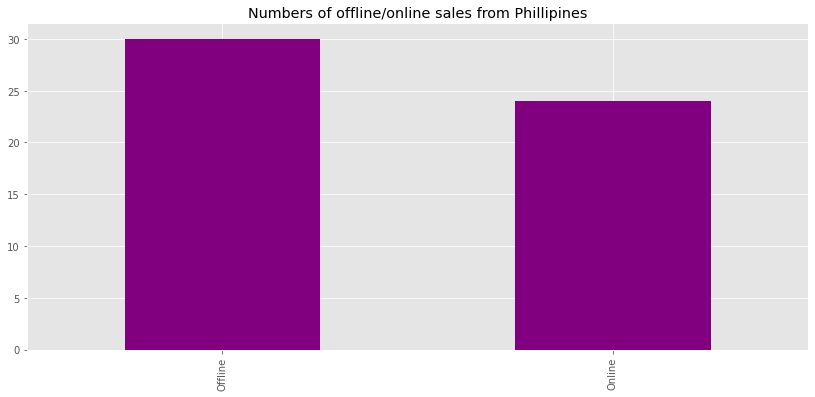

In [24]:
plt.figure(figsize=(14,6))
df[df.Country=='Philippines']['Sales Channel'].value_counts().plot(kind='bar',color='purple')
plt.title("Numbers of offline/online sales from Phillipines")
plt.show()

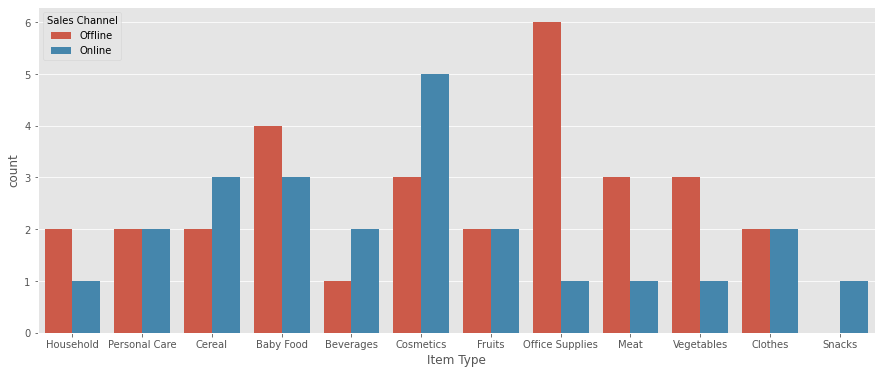

In [25]:
Ph = df[df.Country=='Philippines']

plt.figure(figsize=(15,6))
sns.countplot("Item Type" , data=Ph , hue = Ph["Sales Channel"])
plt.show()

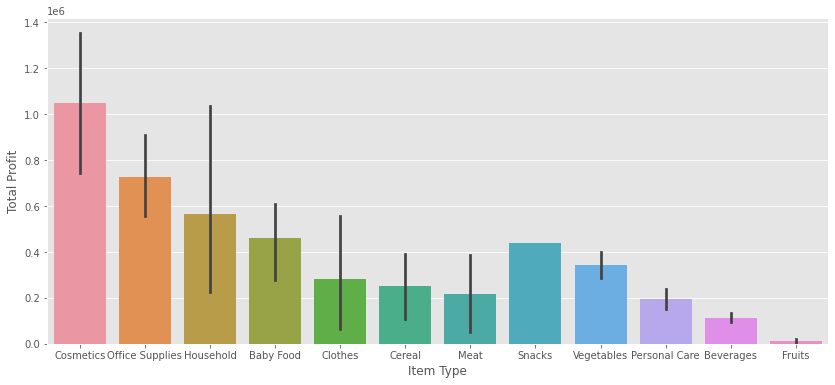

In [26]:
plt.figure(figsize=(14,6))
sns.barplot(x='Item Type',y='Total Profit',data=Ph.sort_values(by='Total Profit',ascending=False))
plt.show()

In [27]:
print("Average number of Units Sold from Phillipinies is:", df[df.Country=='Philippines']["Units Sold"].mean())
print("Average number of Total Profit from Phillipinies is:", df[df.Country=='Philippines']["Total Profit"].mean())

Average number of Units Sold from Phillipinies is: 5184.425925925926
Average number of Total Profit from Phillipinies is: 455854.1975925926


>>  **Sub-STEP 3.2**  (Feature selection with respect to Total Revenue)

In [28]:
df2 = df.drop(['Total Profit'],axis=1)
df2.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Revenue
0,Sub-Saharan Africa,Chad,Office Supplies,Online,Low,1/27/2011,2/12/2011,4484,651.21,2920025.64
1,Europe,Latvia,Beverages,Online,Critical,12/28/2015,1/23/2016,1075,47.45,51008.75
2,Middle East and North Africa,Pakistan,Vegetables,Offline,Critical,1/13/2011,2/1/2011,6515,154.06,1003700.90


In [29]:
df2["Sales Channel"] = labelencoder.fit_transform(df2["Sales Channel"].values)
df2["Order Priority"] = labelencoder.fit_transform(df2["Order Priority"].values)
df2["Item Type"] = labelencoder.fit_transform(df2["Item Type"].values)
df2["Country"] = labelencoder.fit_transform(df2["Country"].values)
df2["Region"] = labelencoder.fit_transform(df2["Region"].values)
df2.drop(["Order Date"],axis=1,inplace=True)
df2.drop(["Ship Date"],axis=1,inplace=True)
df2.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Revenue
0,6,29,8,1,2,4484,651.21,2920025.64
1,3,85,1,1,0,1075,47.45,51008.75
2,4,122,11,0,0,6515,154.06,1003700.90
3,6,38,6,1,0,7683,668.27,5134318.41
4,3,37,1,1,0,3491,47.45,165647.95


In [30]:
df.groupby('Country')['Item Type'].value_counts().sort_values(ascending=False).head()

Country       Item Type      
Moldova       Snacks             13
Nigeria       Household          13
Vatican City  Beverages          12
Slovenia      Vegetables         12
Rwanda        Office Supplies    12
Name: Item Type, dtype: int64

In [31]:
df_new = df.groupby(by='Country',as_index=False,sort=False).sum()

df_new.sort_values(by='Total Profit',ascending=True).head()

,Country,Units Sold,Unit Price,Total Profit,Revenue
129,Tajikistan,186095,9757.09,13662027.26,41976730.89
90,Mali,151864,10372.01,13800334.90,44640992.08
108,Malta,221647,10570.29,14163744.55,48557572.79
38,Italy,189268,12433.30,14199991.25,47237488.82
168,Cape Verde,191402,11591.37,14383303.52,47056031.02


Text(0.5, 1.0, "Profit Counts from different 'Item Types'")

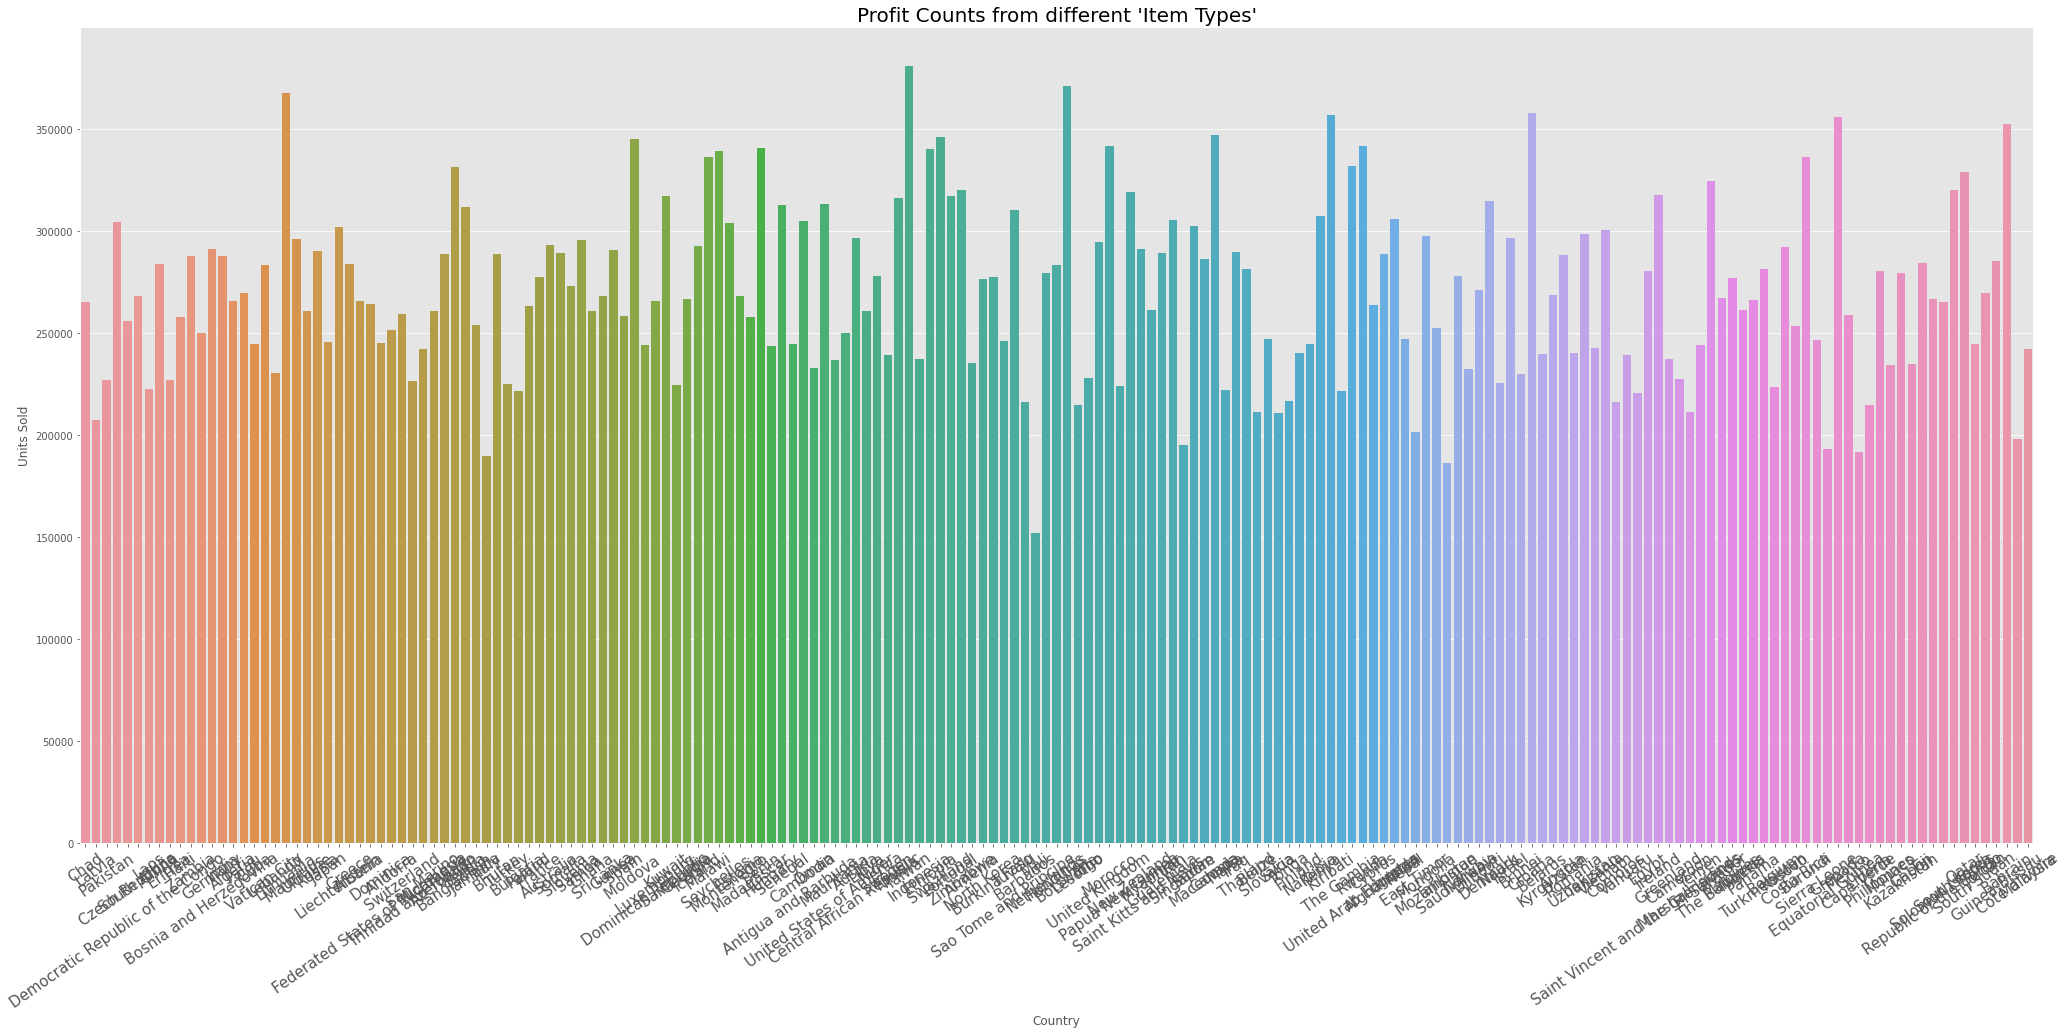

In [32]:
grouped = df.groupby(by='Country',as_index=False,sort=False).sum()
plt.figure(figsize=(35,15))
sns.barplot(x='Country' , y='Units Sold' , data=grouped)
plt.xticks(rotation=35, size=15)
plt.title("Profit Counts from different 'Item Types'",size=20)

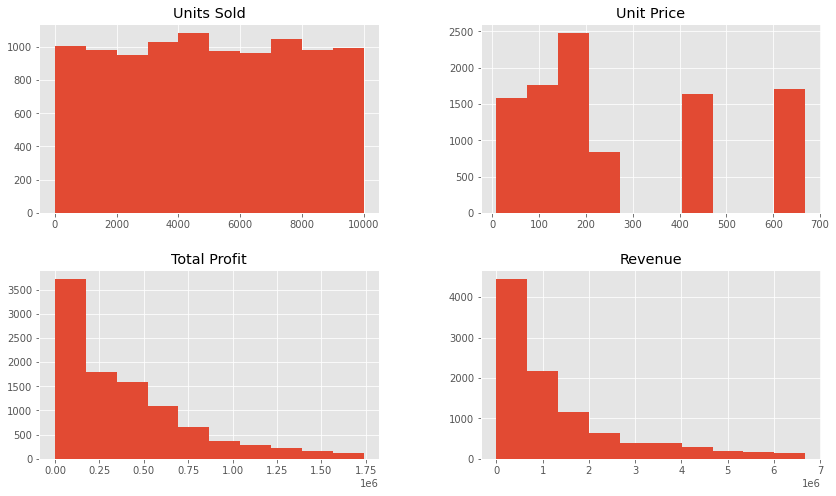

In [33]:
df.hist(figsize=(14,8))
plt.show()

Text(0.5, 1.0, "Profit Counts from different 'Item Types'")

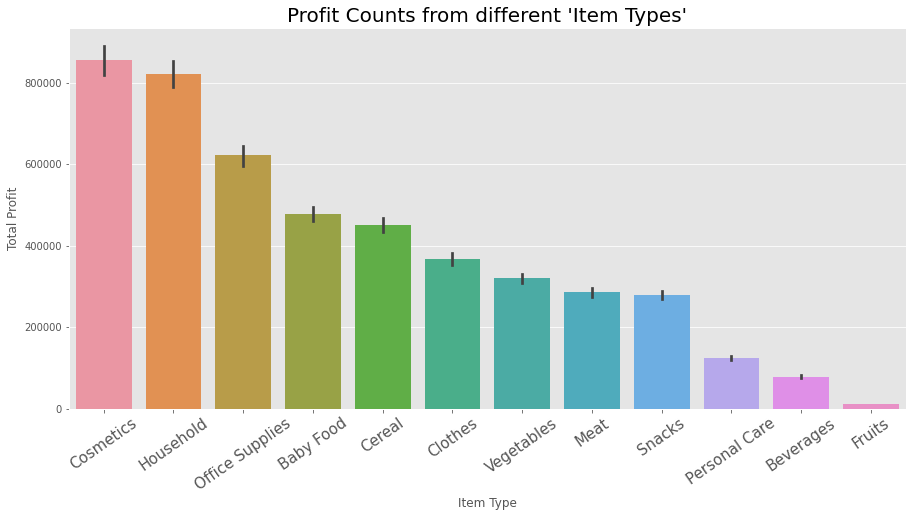

In [34]:
plt.figure(figsize=(15,7))
sns.barplot(x='Item Type' , y='Total Profit' , data=df.sort_values(by='Total Profit',ascending=False))
plt.xticks(rotation=35, size=15)
plt.title("Profit Counts from different 'Item Types'",size=20)

Text(0.5, 1.0, 'Sales Mode Counts Region Wise')

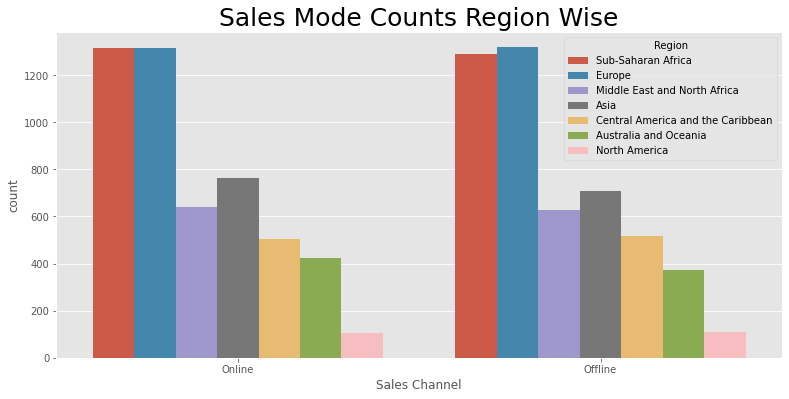

In [35]:
plt.figure(figsize=(13,6))
sns.countplot("Sales Channel" , data=df , hue = df.Region)
plt.title("Sales Mode Counts Region Wise",size=25)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Office Supplies'),
  Text(1, 0, 'Beverages'),
  Text(2, 0, 'Vegetables'),
  Text(3, 0, 'Household'),
  Text(4, 0, 'Baby Food'),
  Text(5, 0, 'Meat'),
  Text(6, 0, 'Cereal'),
  Text(7, 0, 'Clothes'),
  Text(8, 0, 'Snacks'),
  Text(9, 0, 'Personal Care'),
  Text(10, 0, 'Cosmetics'),
  Text(11, 0, 'Fruits')])

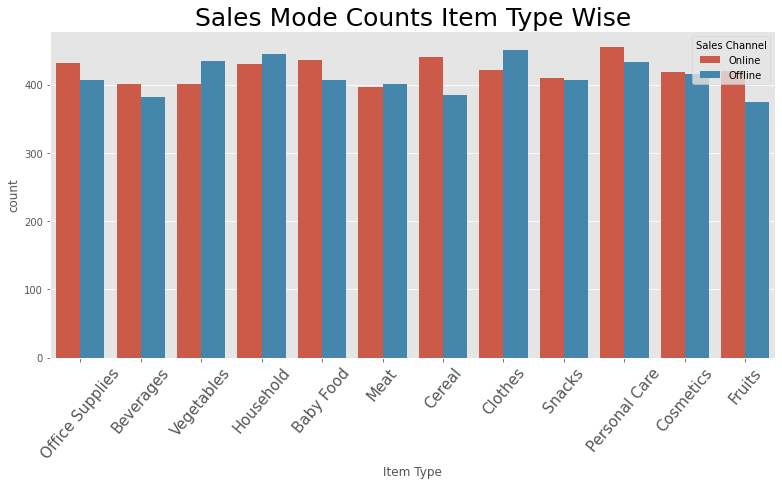

In [36]:
plt.figure(figsize=(13,6))
sns.countplot("Item Type" , data=df , hue="Sales Channel")
plt.title("Sales Mode Counts Item Type Wise",size=25)
plt.xticks(rotation=50,size=15)

In [37]:
C_S1 = pd.crosstab(df["Country"] , df["Sales Channel"]).sort_values(by='Offline',ascending=False).head(10)
C_S1

Sales Channel,Offline,Online
Country,,
United Arab Emirates,43,22
Moldova,41,30
Burundi,39,27
Canada,39,28
Kiribati,39,29
Benin,36,26
Swaziland,35,29
Grenada,35,26
Democratic Republic of the Congo,34,26


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, 'Democratic Republic of the Congo'),
  Text(0.0, 0, 'United Arab Emirates'),
  Text(2.0, 0, 'Burundi'),
  Text(4.0, 0, 'Kiribati'),
  Text(6.0, 0, 'Swaziland'),
  Text(8.0, 0, 'Democratic Republic of the Congo'),
  Text(10.0, 0, '')])

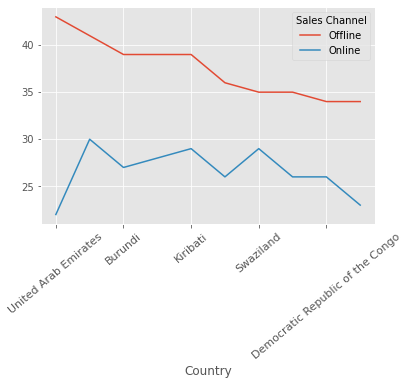

In [38]:
C_S1.plot()
plt.xticks(rotation=40,size=11)

In [39]:
C_S2 = pd.crosstab(df["Country"] , df["Sales Channel"]).sort_values(by='Online',ascending=False).head(10)
C_S2

Sales Channel,Offline,Online
Country,,
Lithuania,30,42
Cambodia,25,41
United Kingdom,33,39
Croatia,31,39
India,25,38
Seychelles,32,38
Botswana,31,38
Zimbabwe,22,37
Morocco,30,37


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, 'Morocco'),
  Text(0.0, 0, 'Lithuania'),
  Text(2.0, 0, 'United Kingdom'),
  Text(4.0, 0, 'India'),
  Text(6.0, 0, 'Botswana'),
  Text(8.0, 0, 'Morocco'),
  Text(10.0, 0, '')])

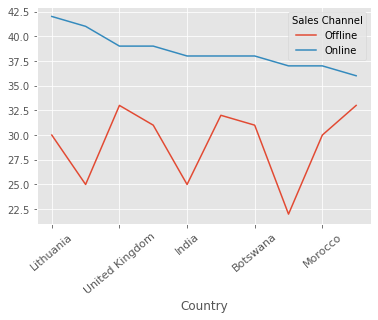

In [40]:
C_S2.plot()
plt.xticks(rotation=40,size=11)